<a href="https://colab.research.google.com/github/leoserpa/scripts/blob/main/Estat%C3%ADstica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de Posição e Tendência Central

Importando as bibliotecas

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
from cycler import cycler 
from scipy.stats.mstats import gmean, hmean
from scipy import stats 

**Média Aritmética (MA) - É a soma de todos os elementos do conjunto, divididos pelo número de elementos que compõe o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c938ca170f8c4a5d2dddecabc5ae1d5eb5f35a2b)

In [40]:
dados = [1,5,3,6,3]

In [41]:
np.mean(dados)

3.6

**Média Geométrica (MG) - É a raíz n-ésima do produto de todos os elementos que compõe o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/82fb3d898a5de7ae016b07855c335ce570350410)

In [42]:
gmean(dados)

3.0638870628004056

**Média Harmônica (MH) - É o número de elementos, divididos pela soma dos inversos dos elementos que compõem o conjunto.**

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5335415727099e38ba27a1775613020dc4b584de)

In [78]:
hmean(dados)

2.459016393442623

# Quando usar cada uma das médias?

Funções para plotar gráficos

In [79]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='#000000',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='red',ms=15)
  plt.show()

In [45]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [67]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='red')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = '#000000')

### Considere os cenários

Exemplo de dados gerados a partir de uma **operação de adição**, a soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [80]:
dados_linear = [1, 5, 3, 8, 7, 10, 20]

Calculando a média aritmética

In [81]:
media = int(np.mean(dados_linear))

In [82]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 7


Plotando os dados e seu valor central

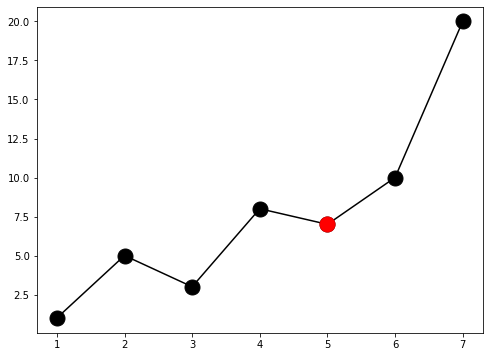

In [83]:
plot_lines(dados_linear, media)

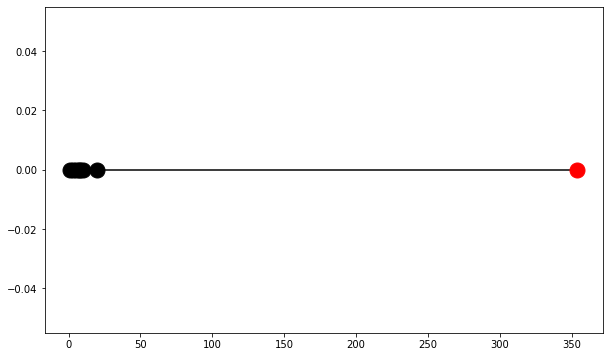

In [70]:
plot_lines_horizontal(dados_linear, media)

Exemplo de dados gerados a partir de uma **operação de multiplicação**, a multiplicação de cada elemento pelo valor de 3 (relacionamento exponencial)

In [54]:
dados_exponencial = [4, 30, 50 , 85, 549, 864 , 900]

Calculando a média aritmética.

In [55]:
media = int(np.mean(dados_exponencial))

In [57]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 354


Plotando os dados e seu valor central.

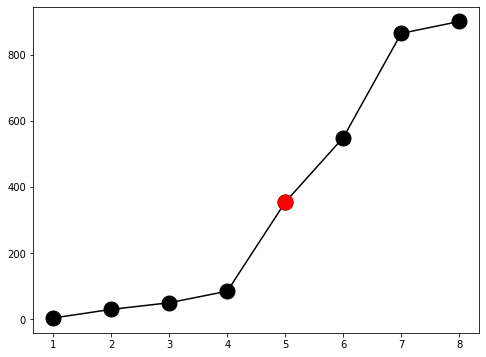

In [69]:
plot_lines(dados_exponencial, media)

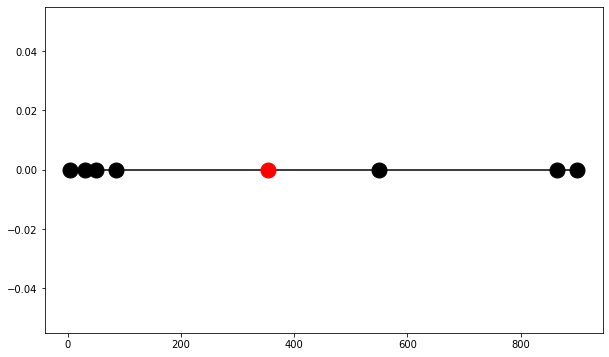

In [68]:
plot_lines_horizontal(dados_exponencial, media)

Considerando agora a aplicação da média geométrica.

Especificando os mesmos dados com um relacionando exponencial.

In [71]:
dados_exponencial = [4, 30, 50 , 85, 549, 864 , 900]

Calculando a média geométrica.

In [73]:
media_geo = int(gmean(dados_exponencial))

In [74]:
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 111


Plotando os dados e seu valor central.

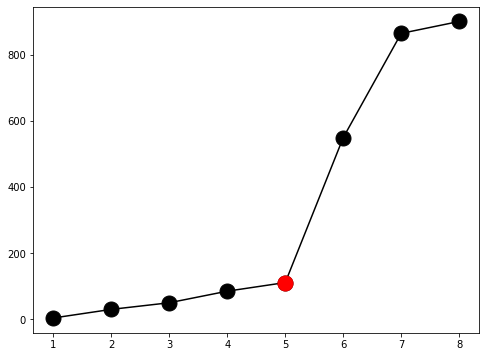

In [75]:
plot_lines(dados_exponencial, media_geo)

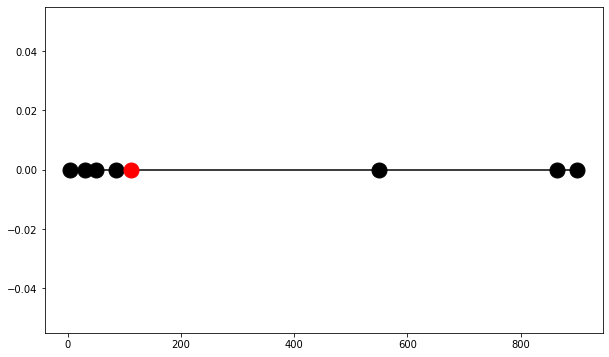

In [76]:
plot_lines_horizontal(dados_exponencial, media_geo)

### Considerações importantes

*   A **média aritmética** produz um resultado interessante quando temos um **relacionamento aditivo** entre os números da amostra.
*   Este relacionamento é chamado linear pois, ao exibir graficamente os valores tendem a seguir uma linha ascendente ou descendente.
*   Já a **média geométrica** é mais apropriada quando temos uma amostra com um **relacionamento multiplicativo** ou exponencial.


*   A diferença entre as médias é que enquanto a média aritmética faz a **soma** de todos os elementos e depois a **divisão**, a média geométrica atua com a **multiplicação** entre os elementos e depois reescala através da **raiz** os valores para a mesma unidade da amostra.


